In [2]:
import numpy as np

def create_label(image_name):
    name = image_name.split('.')[0]
    if name=="Rabindra":
        return np.array([1,0,0])
    elif name=="Riju":
        return np.array([0,1,0])
    elif name=="Rojina":
        return np.array([0,0,1])

In [4]:
import os
import cv2
from random import shuffle
from tqdm import tqdm

def mydata():
    data=[]
    for image in tqdm(os.listdir("dataset")):
        path=os.path.join("dataset",image)
        image_data =cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        image_data =cv2.resize(image_data, (50,50))
        data.append([np.array(image_data),create_label(image)])

    shuffle(data)
    return data 


data = mydata()

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:23<00:00, 129.77it/s]


In [5]:
train = data[:2400]
test = data[2400:]
x_train = np.array([i[0]  for i in train]).reshape(-1,50,50,1)
y_train = np.array([i[1] for i in train])
print(x_train.shape)
print(y_train.shape)
x_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
y_test = np.array([i[1] for i in test])
print(x_test.shape)
print(y_train.shape)

(2400, 50, 50, 1)
(2400, 3)
(600, 50, 50, 1)
(2400, 3)


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)
model.save('my_model.h5')

Epoch 1/10
75/75 [==============================] - 11s 123ms/step - loss: 0.4541 - accuracy: 0.8971 - val_loss: 0.0185 - val_accuracy: 0.9983
Epoch 2/10
75/75 [==============================] - 9s 117ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/10
75/75 [==============================] - 9s 119ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/10
75/75 [==============================] - 9s 126ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 9.2923e-04 - val_accuracy: 1.0000
Epoch 5/10
75/75 [==============================] - 9s 119ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/10
75/75 [==============================] - 9s 123ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 7/10
75/75 [==============================] - 9s 119ms/step - loss: 7.0873e-04 - accuracy: 1.0000 - val_loss: 1.9193e-04 - val_accuracy: 

In [7]:
def data_for_testing():
    Tdata=[]
    for images in tqdm(os.listdir("Testing images")):
        path=os.path.join("Testing images",images)
        image_id = images.split('.')[0]
        image_data =cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        image_data =cv2.resize(image_data, (50,50))
        Tdata.append([np.array(image_data),image_id])

    shuffle(Tdata)
    return Tdata 



In [8]:
Tdata=data_for_testing()

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 151.12it/s]


1/1 [==============================] - 0s 37ms/step


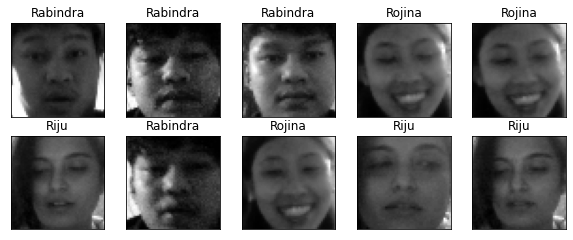

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

for num, data in enumerate(Tdata[:10]):
    img_data = data[0]
    y = fig.add_subplot(5, 5, num+1)
    image = img_data
    data = image.reshape(-1,50,50,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out)==0:
        label = "Rabindra"
        
    elif np.argmax(model_out)==1:
        label = "Riju"
        
    elif np.argmax(model_out)==2:
        label = "Rojina"
        
    y.imshow(img_data,cmap="gray")
    
    plt.title(label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()